In [2]:
from IPython.core.display import display, HTML
display(HTML("""<style>
.container { width:99% !important; }
div.text_cell_render { /* Customize text cells */
    font-size:1.5em;
    line-height:1.4em;
    padding-left:3em;
    padding-right:3em;
}
</style>"""))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, h

def CI_median(data):
    data.sort()
    n = len(data)
    idx1 = int(np.round((n/2)-(1.96*np.sqrt(n)/2)))
    idx2 = int(np.round(1+(n/2)+(1.96*np.sqrt(n)/2)))
    lower = data[idx1]
    upper = data[idx2]
    return lower, upper

## Mamiraua Dataset Plot

In [4]:
lag = 512

base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

### Temporal goups in HxC plane

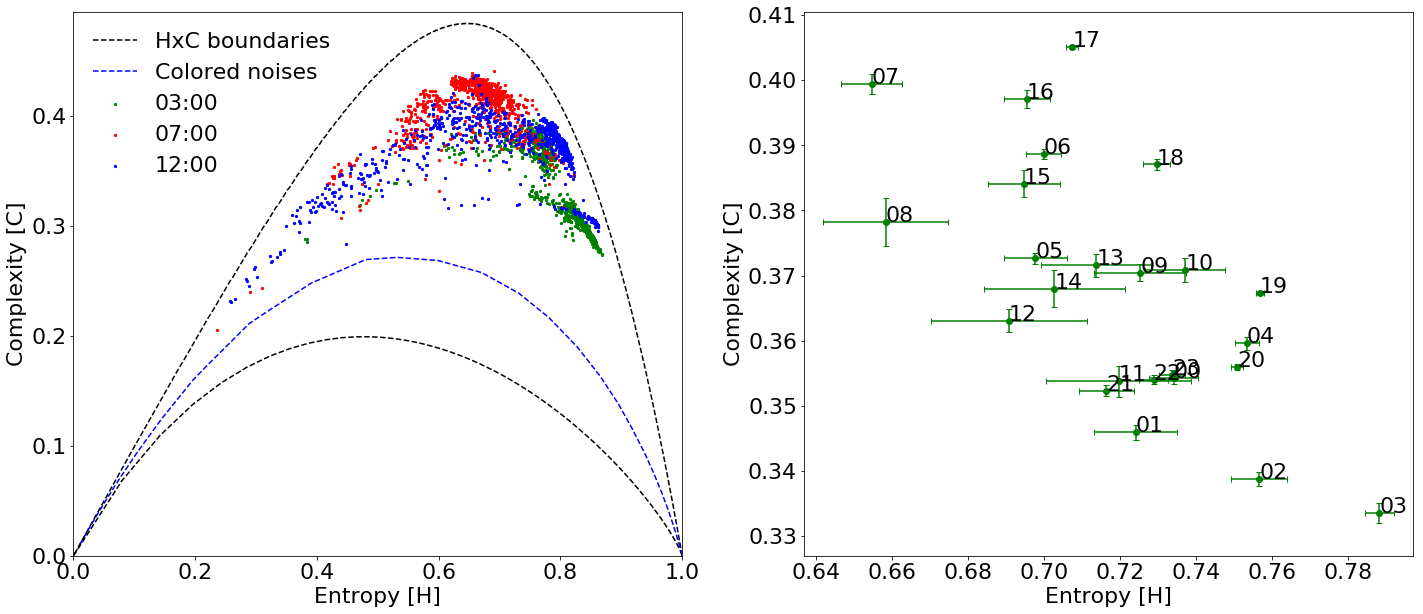

In [8]:
## Plot com tres horas do dia

time = np.unique(base['time'])

H1 = base.loc[base['time'] == '030000']['H']
C1 = base.loc[base['time'] == '030000']['C']

H2 = base.loc[base['time'] == '070000']['H']
C2 = base.loc[base['time'] == '070000']['C']

H3 = base.loc[base['time'] == '120000']['H']
C3 = base.loc[base['time'] == '120000']['C']

plt.figure(figsize=(24,10))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

plt.subplot(1,2,1)
plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.legend(loc = 'upper left', frameon=False)

plt.scatter(H1, C1, marker='.', s=20, c='g', label = '03:00') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues
plt.scatter(H2, C2, marker='.', s=20, c='r', label = '07:00') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues
plt.scatter(H3, C3, marker='.', s=20, c='b', label = '12:00') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues

plt.legend(loc = 'upper left', frameon=False)


## Plot com os grupos formados a cada uma hora

time = np.unique(base['time'])
H_mu = np.empty((0))
H_var = np.empty((0))

C_mu = np.empty((0))
C_var = np.empty((0))

JSD_mu = np.empty((0))
JSD_var = np.empty((0))

t = np.empty(0)

n = 1 # sample every n hours

for j in time:
    if j[2:3] == '0': 
        t = np.append(t,str(j[0:2]))
        
        H = base.loc[(base['time'] == j) | (base['time'] == str(j[0:2] + '3000'))]['H']
        H_mu = np.append(H_mu,np.mean(H))
        H_var = np.append(H_var,np.var(H))

        C = base.loc[(base['time'] == j) | (base['time'] == str(j[0:2] + '3000'))]['C']
        C_mu = np.append(C_mu,np.mean(C))
        C_var = np.append(C_var,np.var(C))

plt.subplot(1,2,2)
plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')

plt.errorbar(H_mu, C_mu, xerr=H_var, yerr=C_var, color = 'g',fmt='o', capsize=3)

i = 0
for label in t:
    plt.annotate(label, xy=(H_mu[i], C_mu[i]))
    i = i + 1
    
plt.xlim([np.min(H_mu-H_var)-0.005, np.max(H_mu+H_var)+0.005])
plt.ylim([np.min(C_mu-C_var)-0.005, np.max(C_mu+C_var)+0.005])

plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')

plt.savefig('./figures/Fig6.eps', format="eps", bbox_inches='tight')

plt.show()